In [1]:
import numpy as np
import matplotlib.pyplot as plt

(-1.5097692225794739,
 1.4894636471210498,
 -2.5694974621848816,
 2.094193452669242)

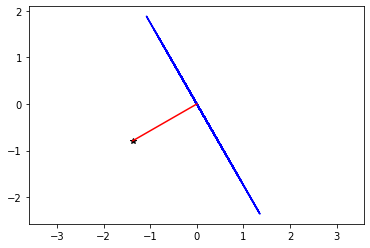

In [22]:
#Let's start with a theta
theta = np.random.randn(2)

#Meet theta
plt.plot(theta[0],theta[1],'k*')


#Meet the hyperplane generated by {z : theta^Tz = 0}
H = np.random.randn(100,2)
H = H - np.outer(np.dot(H,theta),theta)/ np.dot(theta,theta) #This is the projection on the nullspace of theta.T

plt.plot(H[:,0],H[:,1],'b')
#This is our separating hyperplane! It does not depend on data. It depends on theta.

#Theta is the "normal" to this hyperplane
plt.plot([0,theta[0]],[0,theta[1]],'r')

plt.axis('equal')



distance of magenta point to hyperplane =  1.7503073480022227


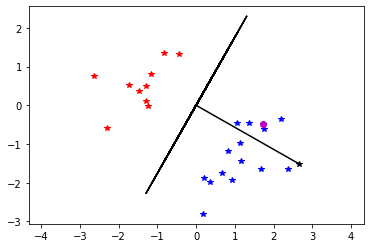

In [3]:
#(old plot, carried over)
plt.plot(theta[0],theta[1],'k*')
plt.plot(H[:,0],H[:,1],'k')
plt.plot([0,theta[0]],[0,theta[1]],'k')
plt.axis('equal')

#Now let's generate some data. 
m = 25
#Let's go out of our way to ensure that our data is widely separable. That is, yx^Ttheta is somewhat large.
y = np.zeros(m)
x = np.zeros((m,2))
for k in range(m):
    xx = np.random.randn(2)
    while np.abs( np.dot(xx,theta)/np.sqrt(np.dot(theta,theta))) < 1: xx = np.random.randn(2)
    x[k,:] = xx
    y[k] = np.sign(np.dot(xx,theta))
    
#Now let's see where the data lies

plt.plot(x[np.equal(y,1),0],x[np.equal(y,1),1],'b*')
plt.plot(x[np.equal(y,-1),0],x[np.equal(y,-1),1],'r*')

#The distance from each point to the hyperplane generated by theta is characterized by (ysign(x^Ttheta))/||theta||_2
d = y[0]*np.dot(x[0,:],theta)/np.sqrt(np.dot(theta,theta))
print('distance of magenta point to hyperplane = ', d)
plt.plot(x[0,0],x[0,1],'mo')

#(you can run this several times to see different instances (Random every time))


margin =  -2.2994464389877467


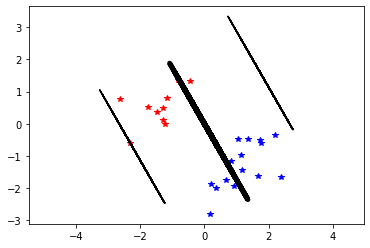

In [24]:
#(old plot, carried over)
plt.plot(x[np.equal(y,1),0],x[np.equal(y,1),1],'b*')
plt.plot(x[np.equal(y,-1),0],x[np.equal(y,-1),1],'r*')
plt.plot(H[:,0],H[:,1],'k',linewidth=5)
plt.axis('equal')

#Now let's compute the margin. It is characterized by the smallest distance $yx^Ttheta/theta^Ttheta. 
d = np.dot((x.T*y).T,theta)/np.sqrt(np.dot(theta,theta))
margin = min(d)
print('margin = ', margin)
#let's plot the margin

M = np.random.randn(100,2)
Mnull = M - np.outer(np.dot(M,theta),theta)/ np.dot(theta,theta)
Moffset = margin * theta / np.sqrt(np.dot(theta,theta))

Mup = Mnull + Moffset
Mdown = Mnull - Moffset
plt.plot(Mup[:,0],Mup[:,1],'k')
plt.plot(Mdown[:,0],Mdown[:,1],'k')

In [5]:
#ok, now stuff is (hopefully starting to make sense! 
#But, there's this constant need to divide by the norm of theta, which is super annoying. 
#So, we have two options
# 1. we can normalize theta (e.g. dictate that ||theta||_2 = 1)
# 2. We can normalize the unnormalized minimum margin quantity, e.g. dictate that min(yx^Ttheta) = 1
#We know that in SVM, we choose option 2 (which seems counterintuitive, but better for computation)

#So let's do that! We now use thetatilde = theta / norm(theta) * margin
thetatilde = theta / np.linalg.norm(theta) * margin
#Let's check if that worked
print('margin is ', np.linalg.norm(thetatilde))

margin is  1.0441331142707084
